# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: Руднев Сергей Михайлович

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [3]:
X = np.asarray(X, dtype=np.uint8)
y = np.asarray(y, dtype=np.uint8)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, shuffle=False)

In [5]:
del X
del y

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [5]:
features_numbers = np.random.randint(0, X_train.shape[1], size = 10)
X_train_for_time_analysis = X_train[:,features_numbers]
X_test_for_time_analysis = X_test[:,features_numbers]

In [6]:
for i in ['kd_tree', 'ball_tree', 'brute', 'my_own']:
    alg = BatchedKNNClassifier(n_neighbors=5, algorithm=i, metric='euclidean', weights='uniform')
    alg.fit(X_train_for_time_analysis, y_train)
    %time distances, indices = alg.kneighbors(X_test_for_time_analysis, return_distance=True)

Wall time: 3.72 s
Wall time: 8.33 s
Wall time: 15.1 s


C:\Users\home-pc\Desktop\Ozon Masters\1 сем\ML-1\дз\E\KNN\knn\distances.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(u + v - 2*(x @ y.T))  # вычитаем попарные скалярные произведения векторов из x и векторов из y


Wall time: 6min 33s


In [7]:
features_numbers = np.random.randint(0, X_train.shape[1], size = 20)
X_train_for_time_analysis = X_train[:,features_numbers]
X_test_for_time_analysis = X_test[:,features_numbers]

In [8]:
for i in ['kd_tree', 'ball_tree', 'brute', 'my_own']:
    alg = BatchedKNNClassifier(n_neighbors=5, algorithm=i, metric='euclidean', weights='uniform')
    alg.fit(X_train_for_time_analysis, y_train)
    %time distances, indices = alg.kneighbors(X_test_for_time_analysis, return_distance=True)

Wall time: 9.94 s
Wall time: 28.7 s
Wall time: 14.6 s


C:\Users\home-pc\Desktop\Ozon Masters\1 сем\ML-1\дз\E\KNN\knn\distances.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(u + v - 2*(x @ y.T))  # вычитаем попарные скалярные произведения векторов из x и векторов из y


Wall time: 8min 44s


In [9]:
features_numbers = np.random.randint(0, X_train.shape[1], size = 100)
X_train_for_time_analysis = X_train[:,features_numbers]
X_test_for_time_analysis = X_test[:,features_numbers]

In [10]:
for i in ['kd_tree', 'ball_tree', 'brute', 'my_own']:
    alg = BatchedKNNClassifier(n_neighbors=5, algorithm=i, metric='euclidean', weights='uniform')
    alg.fit(X_train_for_time_analysis, y_train)
    %time distances, indices = alg.kneighbors(X_test_for_time_analysis, return_distance=True)

Wall time: 2min 13s
Wall time: 2min 35s
Wall time: 16.9 s


C:\Users\home-pc\Desktop\Ozon Masters\1 сем\ML-1\дз\E\KNN\knn\distances.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(u + v - 2*(x @ y.T))  # вычитаем попарные скалярные произведения векторов из x и векторов из y


Wall time: 20min 37s


#### Приведите график / таблицу с результатами вашего эксперимента

In [31]:
kd_tree_time = [3.72, 9.94, 133]
ball_tree_time = [8.33, 28.7, 155]
brute_time = [15.1, 14.6, 16.9]
my_own_time = [393, 524, 1237]
time_results = pd.DataFrame({'10': [kd_tree_time[0], ball_tree_time[0], brute_time[0], my_own_time[0]],
                             '20': [kd_tree_time[1], ball_tree_time[1], brute_time[1], my_own_time[1]],
                             '100': [kd_tree_time[2], ball_tree_time[2], brute_time[2], my_own_time[2]]
                            }, index=['kd_tree', 'ball_tree', 'brute', 'my_own'])

In [32]:
time_results

,10,20,100
kd_tree,3.72,9.94,133.0
ball_tree,8.33,28.70,155.0
brute,15.10,14.60,16.9
my_own,393.00,524.00,1237.0


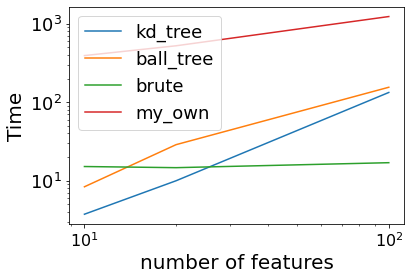

In [43]:
features_range = [10, 20, 100]
plt.plot(features_range, kd_tree_time, label="kd_tree")
plt.plot(features_range, ball_tree_time, label="ball_tree")
plt.plot(features_range, brute_time, label="brute")
plt.plot(features_range, my_own_time, label="my_own")
plt.legend(fontsize=18)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

    Для 10 признаков быстрее всего сработал алгоритм 'kd_tree', а для 20 и 100 - 'brute'. Я ожидал, что деревья будут справляться лучше для любого количества признаков.

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

    Алгоритм 'kd_tree' заключается в использовании двочиного дерева поиска. Поэтому поиск, вставка и удаление элемента в нём занимают $O(\log l)$, где $l$ - количество объектов в выборке. Сначала строится дерево из объектов обучающей выборки, потом для каждого элемента из тестовой выборки: добавляем егов дерево ищем $k$ соседей и удаляем его из дерева. Так что для  алгоритма поиска ближайших соседей получим $O(mk\log n)$, где $n$ - количество элементов в обучающей выборке, $m$ - количество элементов в тестовой выборке. В нашем случае $m=n/6$, $k=5$, так что получим $O(N\log N)$, $N$ - количество объектов во всей выборке. Всё это было для $1$ признака, поэтому для $d$ признаков получим $O(dN\log N)$

    Алгоритм 'ball_tree' также использует двоичное дерево поиска, но в узлах содержит шары, на которые разбивает пространство. Сложность будет $O(dN\log N)$
    Алгоритм 'brute' - стандартная реализация knn, считающая расстояния до всех соседей. Так что ложность будет $O(dN^2)$.

    Алгоритм 'my_own' имеет сложность $O(dN^2)$.
    
    На практике время работы алгоритмов не всегда согласуется с теоретической сложностью. Алгоритм 'my_own' получился настолько хуже по времени, чем остальные, потому что я много лишнего копирования использовал, но все тесты на ejudge алгоритм прошёл. Однако асимптотически по количеству признаков его сложность на практике оказалась очень похожей на корень, что лучше заявленной линейной и лучше асимптотики, получившейся для деревьев.
    
    Деревья показали асимптотику по количеству признаков хуже теоретической.
    
    Для 'brute' оказалось, что он не зависит от клоичества признаков.
    

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Исходя из результатов экспериментов следует использовать алгоритм 'brute'. Для таких размерностей данных он лучше всего подходит. Дальше использую его.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [7]:
accuracy_results_euclidean = knn_cross_val_score(X_train, y_train, k_list = [i for i in range(1,11)], 
        algorithm = 'brute', scoring = 'accuracy', metric = 'euclidean', weights = 'uniform', cv=KFold(n_splits=3))

In [9]:
accuracy_results_cosine = knn_cross_val_score(X_train, y_train, k_list = [i for i in range(1,11)], 
        algorithm = 'brute', scoring = 'accuracy', metric = 'cosine', weights = 'uniform', cv=KFold(n_splits=3))

In [23]:
accuracy_results_euclidean_mean =[]
for i in accuracy_results_euclidean:
    accuracy_results_euclidean_mean.append(np.mean(accuracy_results_euclidean[i]))
accuracy_results_euclidean_mean.reverse()

In [26]:
accuracy_results_cosine_mean =[]
for i in accuracy_results_cosine:
    accuracy_results_cosine_mean.append(np.mean(accuracy_results_cosine[i]))
accuracy_results_cosine_mean.reverse()

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

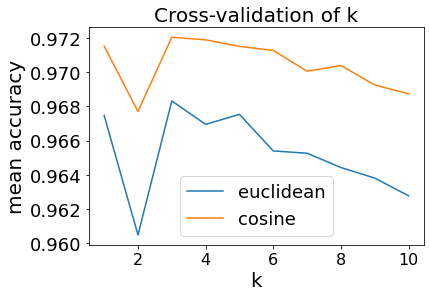

In [38]:
k = [i for i in range(1,11)]
plt.title('Cross-validation of k', fontsize=20)
plt.plot(k, accuracy_results_euclidean_mean, label="euclidean")
plt.plot(k, accuracy_results_cosine_mean, label="cosine")

plt.legend(fontsize=18)
plt.xlabel("k", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   По результатам эксперимента оптимальными я считаю $k$, равное $3$, и метрику косинусную. Заметим, что для $k = 3,4,5$ точность примерно одинаковая. В таком случае лучше выбрать минимальное k, чтобы меньше считать в алгоритме и меньше памяти использовать.


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Лучше себя показала косинусная метрика. Потому что она считает в некотором смысле относительную близость объектов. Что в нашем случае предпочтительнее, так как признаки - значения пикселей.
    
   
2. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.
    
    Да, для $k = 2$ наблюдаем резкое снижение качества для обеих метрик. Думал насчёт чётности $k$, заметны скачки.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [41]:
accuracy_results_cosine_weighted = knn_cross_val_score(X_train, y_train, k_list = [i for i in range(1,11)], 
        algorithm = 'brute', scoring = 'accuracy', metric = 'cosine', weights = 'distance', cv=KFold(n_splits=3))

In [47]:
accuracy_results_cosine_weighted_mean =[]
for i in accuracy_results_cosine_weighted:
    accuracy_results_cosine_weighted_mean.append(np.mean(accuracy_results_cosine_weighted[i]))
accuracy_results_cosine_weighted_mean.reverse()

#### Нарисуйте график зависимости точности от количества соседей 

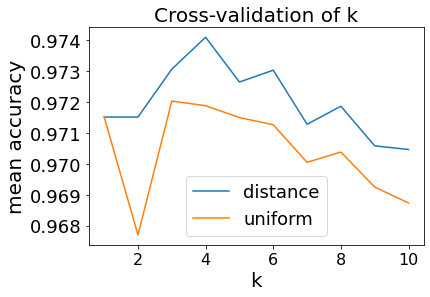

In [48]:
k = [i for i in range(1,11)]
plt.title('Cross-validation of k', fontsize=20)
plt.plot(k, accuracy_results_cosine_weighted_mean, label='distance')
plt.plot(k, accuracy_results_cosine_mean, label='uniform')
plt.legend(fontsize=18)
plt.xlabel("k", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

    Оптимальным в данном случае будет $k = 4$, после него уже начинается падение точности. Это верно как для взвешенного алгоритма, так и для невзвешенного.
  

2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   По результатм экспериментов для определения ближайшего соседа лучше использовать веса, обратно пропорциональные расстоянию. Это было и изначально понятно, так как модель, учитывающая расстояния до соседей при выборе ближайшего, точнее описывает положение объекта, особенно если k не такой большой. также отметим, что для $k = 1$ точность для одинаковых весов и весов, зависящих от расстояния, будет одинаковая, так как когда выбран один ближайший объект, то выбор ближайшего из одного происходит единственным образом.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [151]:
best_algorithm = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
best_algorithm.fit(X_train, y_train)

In [154]:
y_train_pred = best_algorithm.predict(X_train)

In [152]:
%time y_test_pred = best_algorithm.predict(X_test)

Wall time: 44.8 s


In [155]:
print("accuracy train: ", accuracy_score(y_train_pred, y_train))
print("accuracy test: ", accuracy_score(y_test_pred, y_test))

accuracy train:  1.0
accuracy test:  0.9752


Как и ожидалось, алгорит даёт стопроцентную точность на обучающей выборке, так используемый алгорит считает расстояния до всех объектов обучающей выборки, а расстояние от объекта также из обучающей выборки будет равняться нулю как раз для этого же объекта.

Точность на тесте оказалась даже лучше, чем на кросс-валидации. Значит, данные были однородными, тогда в этом случае чем больше обучающая выборка, тем лучше, а на кросс-валидации для обучения используется не вся изначальная обучающая выборка.

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [114]:
confusion_matrix(y_test, y_test_pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]],
      dtype=int64)

Посмотрим, на каких объектах ошибался алгоритм.

In [91]:
np.where([(y_test == 4) & (y_test_pred == 9)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
 array([ 115,  447,  707,  740,  881, 1178, 1242, 1422, 1778, 1865, 2130,
        2447, 2771, 2901, 3405, 3490, 4017, 4194, 4860, 4911, 5936, 8061,
        8520, 8527, 9211], dtype=int64))

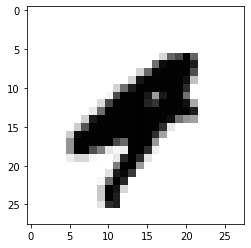

In [101]:
plt.imshow(X_test[447].reshape(28,28), cmap='gray_r')
plt.show()

In [94]:
np.where([(y_test == 7) & (y_test_pred == 1)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 551, 1260, 1500, 2607, 3808, 3838, 3976, 4837, 4886, 4966],
       dtype=int64))

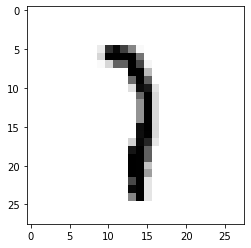

In [99]:
plt.imshow(X_test[1260].reshape(28,28), cmap='gray_r')
plt.show()

In [102]:
np.where([(y_test == 3) & (y_test_pred == 5)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 938,  957, 1290, 2408, 2952, 2953, 4740, 6011, 6045, 6059, 8277,
        8290], dtype=int64))

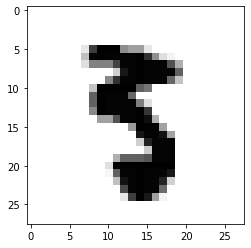

In [111]:
plt.imshow(X_test[2953].reshape(28,28), cmap='gray_r')
plt.show()

In [122]:
# при классификации какой цифры алгоритм хуже всего работает?
np.argmax((np.sum(confusion_matrix(y_test, y_test_pred), axis = 1) - np.diagonal(confusion_matrix(y_test, y_test_pred)))/np.diagonal(confusion_matrix(y_test, y_test_pred)))

8

In [124]:
# при классификации какой цифры алгоритм лучше всего работает?
np.argmin((np.sum(confusion_matrix(y_test, y_test_pred), axis = 1) - np.diagonal(confusion_matrix(y_test, y_test_pred)))/np.diagonal(confusion_matrix(y_test, y_test_pred)))

0

In [129]:
def min_number_of_wrong_types_of_digits(a):
    return np.bincount(a)[0]

In [131]:
np.apply_along_axis(min_number_of_wrong_types_of_digits, 1, confusion_matrix(y_test, y_test_pred))

array([6, 6, 4, 2, 4, 2, 5, 4, 0, 0], dtype=int64)

Исходя из вида confusion_matrix сделаем несколько выводов. Ошибаясь, алгоритм чаще всего считает четвёрки девятками, единицы семёрками и тройки пятёрками. Судя по картинкам представителей таких ошибок их тестовой выборки, это вполне обоснованные ошибки, то есть цифры действительно можно было спутать даже визуально.

Цифры 8 и 9 алгоритм путал со всеми остальными. Цифры 0 и 1 алгоритм путал с меньшим числом других видов цифр(с 3 видами).

Хуже всего алгоритм справляется с классификацией 8: там выше всего процент несовпаданий. А лучше всего алгоритм справляется с классификацией 0: там ниже всего процент несовпаданий.

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [11]:
from skimage import transform # для поворотов картинок
import scipy.ndimage as ndimage # для сдвигов картинок
import cv2

Для ускорения работы эксперимента совершим не полный перебор параметров, а будем последовательно выбирать лучшее значение параметра для текущего преобразования, запоминать его и двигаться к следующему преобразованию.

Также будем проводить валидацию на отдельной валидационной выборке меньшего размера.

In [47]:
_, X_val, _, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

Повороты

In [48]:
angles = [5, 10, 15, -5, -10, -15]

In [49]:
cv = KFold(n_splits=3)
score_KFold = np.zeros(3)
score = {}
for j in angles:
    def transform_(a):
        return transform.rotate(a.reshape(28,28), j, resize=False).reshape(784,)
    X_val_rotated = np.apply_along_axis(transform_, 1, X_val)  # совершаем преобразование 
    X_val_new = np.vstack((X_val, X_val_rotated))              # модернизируем выборку
    y_val_new = np.hstack((y_val, y_val))
    i = 0
    for train_index, test_index in cv.split(X_val_new):
        x_train_kfold, x_test_kfold = X_val_new[train_index], X_val_new[test_index]
        y_train_kfold, y_test_kfold = y_val_new[train_index], y_val_new[test_index]
        alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
        alg.fit(x_train_kfold, y_train_kfold)
        distances_KFold, indices_KFold = alg.kneighbors(x_test_kfold, return_distance=True)
        y_pred = alg._predict_precomputed(indices_KFold, distances_KFold)
        score_KFold[i] = accuracy_score(y_test_kfold, y_pred)
        i += 1
    score[j] = np.mean(score_KFold)

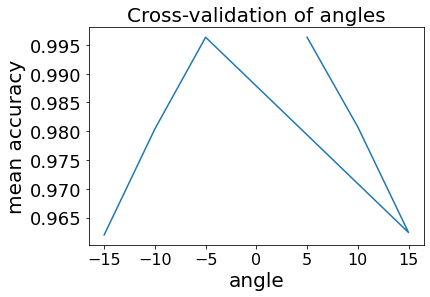

In [50]:
plt.title('Cross-validation of angles', fontsize=20)
plt.plot(score.keys(), score.values())
plt.xlabel("angle", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

Видим, что лучше использовать угол, равный 5, изменим выборку.

In [51]:
def transform_(a):
    return transform.rotate(a.reshape(28,28), 5, resize=False).reshape(784,)
X_val_rotated = np.apply_along_axis(transform_, 1, X_val)
X_val_rotated = np.vstack((X_val, X_val_rotated))
y_val_rotated = np.hstack((y_val, y_val))

Сдвиги по первой оси

In [52]:
shifts = [1, 2, 3]

In [53]:
cv = KFold(n_splits=3)
score_KFold = np.zeros(3)
score = {}
for j in shifts:
    def shift_(a):
        return ndimage.shift(a.reshape(28,28), [j,0]).reshape(784,)
    X_val_shifted = np.apply_along_axis(shift_, 1, X_val)          # совершаем преобразование 
    X_val_new = np.vstack((X_val_rotated, X_val_shifted))          # модернизируем выборку
    y_val_new = np.hstack((y_val_rotated, y_val))
    i = 0
    for train_index, test_index in cv.split(X_val_new):
        x_train_kfold, x_test_kfold = X_val_new[train_index], X_val_new[test_index]
        y_train_kfold, y_test_kfold = y_val_new[train_index], y_val_new[test_index]
        alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
        alg.fit(x_train_kfold, y_train_kfold)
        distances_KFold, indices_KFold = alg.kneighbors(x_test_kfold, return_distance=True)
        y_pred = alg._predict_precomputed(indices_KFold, distances_KFold)
        score_KFold[i] = accuracy_score(y_test_kfold, y_pred)
        i += 1
    score[j] = np.mean(score_KFold)

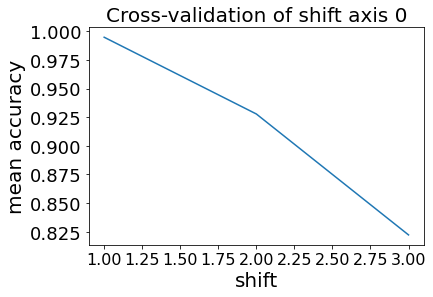

In [54]:
plt.title('Cross-validation of shift axis 0', fontsize=20)
plt.plot(score.keys(), score.values())
plt.xlabel("shift", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

Видим, что лучше использовать сдвиг по первой оси, равный 1, изменим выборку.

In [55]:
def shift_(a):
    return ndimage.shift(a.reshape(28,28), [1,0]).reshape(784,)
X_val_shifted = np.apply_along_axis(shift_, 1, X_val)      # совершаем преобразование 
X_val_shifted = np.vstack((X_val_rotated, X_val_shifted))  # модернизируем выборку
y_val_shifted = np.hstack((y_val_rotated, y_val))

Сдвиги по второй оси

In [56]:
cv = KFold(n_splits=3)
score_KFold = np.zeros(3)
score = {}
for j in shifts:
    def shift_2(a):
        return ndimage.shift(a.reshape(28,28), [0,j]).reshape(784,)
    X_val_shifted_2 = np.apply_along_axis(shift_2, 1, X_val)  # совершаем преобразование 
    X_val_new = np.vstack((X_val_shifted, X_val_shifted_2))  # модернизируем выборку
    y_val_new = np.hstack((y_val_shifted, y_val))
    i = 0
    for train_index, test_index in cv.split(X_val_new):
        x_train_kfold, x_test_kfold = X_val_new[train_index], X_val_new[test_index]
        y_train_kfold, y_test_kfold = y_val_new[train_index], y_val_new[test_index]
        alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
        alg.fit(x_train_kfold, y_train_kfold)
        distances_KFold, indices_KFold = alg.kneighbors(x_test_kfold, return_distance=True)
        y_pred = alg._predict_precomputed(indices_KFold, distances_KFold)
        score_KFold[i] = accuracy_score(y_test_kfold, y_pred)
        i += 1
    score[j] = np.mean(score_KFold)

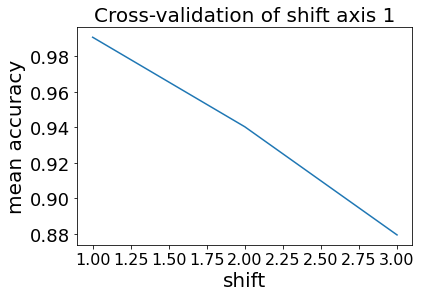

In [57]:
plt.title('Cross-validation of shift axis 1', fontsize=20)
plt.plot(score.keys(), score.values())
plt.xlabel("shift", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

Видим, что лучше использовать сдвиг по второй оси, равный 1, изменим выборку.

In [58]:
def shift_2(a):
    return ndimage.shift(a.reshape(28,28), [0, 1]).reshape(784,)
X_val_shifted_2 = np.apply_along_axis(shift_2, 1, X_val)  # совершаем преобразование 
X_val_shifted_2 = np.vstack((X_val_shifted, X_val_shifted_2))  # модернизируем выборку
y_val_shifted_2 = np.hstack((y_val_shifted, y_val))

Фильтр Гаусса

In [59]:
gauss_filter_var = [0.5, 1, 1.5]
N = 5  # размер фильтра

In [60]:
cv = KFold(n_splits=3)
score_KFold = np.zeros(3)
score = {}
for j in gauss_filter_var:
    def gauss_filt(a):
        return cv2.GaussianBlur(a.reshape(28,28), ksize=(N, N), sigmaX=j).reshape(784,)
    X_val_gauss_filted = np.apply_along_axis(gauss_filt, 1, X_val)  # совершаем преобразование 
    X_val_new = np.vstack((X_val_shifted_2, X_val_gauss_filted))  # модернизируем выборку
    y_val_new = np.hstack((y_val_shifted_2, y_val))
    i = 0
    for train_index, test_index in cv.split(X_val_new):
        x_train_kfold, x_test_kfold = X_val_new[train_index], X_val_new[test_index]
        y_train_kfold, y_test_kfold = y_val_new[train_index], y_val_new[test_index]
        alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
        alg.fit(x_train_kfold, y_train_kfold)
        distances_KFold, indices_KFold = alg.kneighbors(x_test_kfold, return_distance=True)
        y_pred = alg._predict_precomputed(indices_KFold, distances_KFold)
        score_KFold[i] = accuracy_score(y_test_kfold, y_pred)
        i += 1
    score[j] = np.mean(score_KFold)

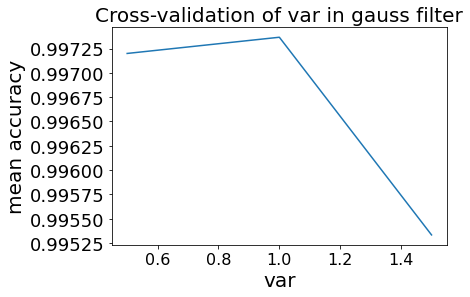

In [61]:
plt.title('Cross-validation of var in gauss filter', fontsize=20)
plt.plot(score.keys(), score.values())
plt.xlabel("var", fontsize=20)
plt.ylabel("mean accuracy", fontsize=20)
plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=18)

Видим, что лучше использовать фильтр Гаусса с дисперсией, равной 1, изменим выборку.

In [62]:
def gauss_filt(a):
    return cv2.GaussianBlur(a.reshape(28,28), ksize=(5, 5), sigmaX=1).reshape(784,)
X_val_gauss_filted = np.apply_along_axis(gauss_filt, 1, X_val)  # совершаем преобразование 
X_val_gauss_filted = np.vstack((X_val_shifted_2, X_val_gauss_filted))  # модернизируем выборку
y_val_gauss_filted = np.hstack((y_val_shifted_2, y_val))

Морфологические операции: эрозия, дилатация, открытие(эрозия, а затем дилатация), закрытие(дилатация, а затем эрозия) с ядром 2

In [63]:
def erode_(a):
    return cv2.erode(a.reshape(28,28), np.ones((2, 2)), iterations=1).reshape(784,) 
def dilate_(a):
    return cv2.dilate(a.reshape(28,28), np.ones((2, 2)), iterations=1).reshape(784,) 
def open_(a):
    return dilate_(erode_(a))
def close_(a):
    return erode_(dilate_(a))

In [64]:
morfologic_transformations = [erode_, dilate_, open_, close_]

In [65]:
cv = KFold(n_splits=3)
score_KFold = np.zeros(3)
score = {}
for j in morfologic_transformations:
    X_val_morfologic_transformed = np.apply_along_axis(j, 1, X_val)  # совершаем преобразование 
    X_val_new = np.vstack((X_val_gauss_filted, X_val_morfologic_transformed))  # модернизируем выборку
    y_val_new = np.hstack((y_val_gauss_filted, y_val))
    i = 0
    for train_index, test_index in cv.split(X_val_new):
        x_train_kfold, x_test_kfold = X_val_new[train_index], X_val_new[test_index]
        y_train_kfold, y_test_kfold = y_val_new[train_index], y_val_new[test_index]
        alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
        alg.fit(x_train_kfold, y_train_kfold)
        distances_KFold, indices_KFold = alg.kneighbors(x_test_kfold, return_distance=True)
        y_pred = alg._predict_precomputed(indices_KFold, distances_KFold)
        score_KFold[i] = accuracy_score(y_test_kfold, y_pred)
        i += 1
    score[j] = np.mean(score_KFold)

In [66]:
score

{<function __main__.erode_(a)>: 0.9978611111111112,
 <function __main__.dilate_(a)>: 0.9985833333333334,
 <function __main__.open_(a)>: 0.99675,
 <function __main__.close_(a)>: 0.9969722222222223}

Видим, что лучше использовать дилатацию. 

In [67]:
del X_val_morfologic_transformed
del X_val_new
del X_val_gauss_filted 
del X_val_shifted_2
del X_val_shifted
del X_val_rotated
del X_val

Применим полученные преобразования ко всей обучающей выборке. Для каждого преобразования будем находить ближайших соседей, а в конце из получившихся выберем ближайших.

Посмотрим, как изменится точность алгоритма. Вообще надо заново проводить кросс-валидацию для определения оптимальных гиперпараметров. Но для экономии времени посмотрим, какой результат получится на оптимальных параметрах для исходной обучающей выборки.

In [93]:
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train, y_train)
distances_train, indices_train = alg.kneighbors(X_test, return_distance=True)

In [95]:
X_train_rotated = np.apply_along_axis(transform_, 1, X_train)
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train_rotated, y_train)
distances_train_rotated, indices_train_rotated = alg.kneighbors(X_test, return_distance=True)
del X_train_rotated

In [97]:
X_train_shifted = np.apply_along_axis(shift_, 1, X_train) 
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train_shifted, y_train)
distances_train_shifted, indices_train_shifted = alg.kneighbors(X_test, return_distance=True)
del X_train_shifted

In [99]:
X_train_shifted_2 = np.apply_along_axis(shift_2, 1, X_train) 
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train_shifted_2, y_train)
distances_train_shifted_2, indices_train_shifted_2 = alg.kneighbors(X_test, return_distance=True)
del X_train_shifted_2

In [103]:
X_train_gauss_filted = np.apply_along_axis(gauss_filt, 1, X_train) 
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train_gauss_filted, y_train)
distances_train_gauss_filted, indices_train_gauss_filted = alg.kneighbors(X_test, return_distance=True)
del X_train_gauss_filted

In [104]:
X_train_dilated = np.apply_along_axis(dilate_, 1, X_train) 
alg = BatchedKNNClassifier(n_neighbors=4, algorithm='brute', metric='cosine', weights='distance')
alg.fit(X_train_dilated, y_train)
distances_train_dilated, indices_train_dilated = alg.kneighbors(X_test, return_distance=True)
del X_train_dilated

In [136]:
def collect_kneighbors_from_batches(dist_batches, ind_batches):
    Dist = np.hstack(dist_batches)
    Indices = np.hstack(ind_batches)
    indices_of_the_best = np.argpartition(Dist, 4, axis=1)[:, :4]
    ranks_top = np.take_along_axis(Dist, indices_of_the_best, axis=1) 
    
    indices_top = ranks_top.argsort(axis=1)
    indices_of_the_best = np.take_along_axis(indices_of_the_best, indices_top, axis=1)
    
    distances = np.take_along_axis(Dist, indices_of_the_best, axis=1)  
    indices = np.take_along_axis(Indices, indices_of_the_best, axis=1)
    return distances, indices

In [137]:
dist = [distances_train, distances_train_rotated, distances_train_shifted, distances_train_shifted_2, 
        distances_train_gauss_filted, distances_train_dilated]
ind = [indices_train, indices_train_rotated, indices_train_shifted, indices_train_shifted_2, 
        indices_train_gauss_filted, indices_train_dilated]

In [138]:
distances_train_midified, indices_train_midified = collect_kneighbors_from_batches(dist, ind)

In [156]:
y_test_pred_modified = alg._predict_precomputed(indices_train_midified, distances_train_midified)

In [158]:
print("accuracy test for midified train: ", accuracy_score(y_test_pred_modified, y_test))

accuracy test for midified train:  0.9835


In [160]:
print("accuracy test for basic train:", accuracy_score(y_test_pred, y_test))

accuracy test for basic train: 0.9752


Видим, что качество улучшилось

Посмотрим, как изменилась матрица ошибок

In [164]:
print("confusion_matrix for modified train")
confusion_matrix(y_test, y_test_pred_modified)

confusion_matrix for modified train


array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1131,    3,    0,    0,    0,    1,    0,    0,    0],
       [   4,    1, 1012,    1,    1,    0,    2,    9,    2,    0],
       [   0,    0,    1,  991,    1,    6,    0,    4,    4,    3],
       [   0,    0,    0,    0,  961,    0,    4,    2,    2,   13],
       [   2,    1,    0,    7,    1,  873,    4,    1,    1,    2],
       [   4,    2,    0,    0,    2,    2,  948,    0,    0,    0],
       [   0,   11,    4,    2,    1,    0,    0, 1005,    0,    5],
       [   2,    0,    2,    6,    2,    3,    4,    4,  949,    2],
       [   1,    3,    0,    3,    4,    1,    1,    5,    4,  987]],
      dtype=int64)

In [165]:
print("confusion_matrix for basic train")
confusion_matrix(y_test, y_test_pred)

confusion_matrix for basic train


array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]],
      dtype=int64)

Раньше алгоритм чаще всего путал 4 с 9. Половины таких ошибок удалось избежать. Ранее я приводил пример объекта, на котором алгоритм допускал эту ошибку.

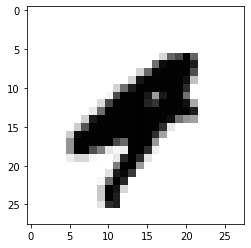

In [168]:
plt.imshow(X_test[447].reshape(28,28), cmap='gray_r')
plt.show()

Эту четвёрку алгоритм считал девяткой 

In [175]:
np.where([(y_test == 4) & (y_test_pred == 9)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
 array([ 115,  447,  707,  740,  881, 1178, 1242, 1422, 1778, 1865, 2130,
        2447, 2771, 2901, 3405, 3490, 4017, 4194, 4860, 4911, 5936, 8061,
        8520, 8527, 9211], dtype=int64))

Можем наблюдать, что теперь алгоритм правильно отгадал эту четвёрку: этого объекта нет среди таких ошибок. Вероятнее всего, этого удалось избежать с помощью дилатации

In [166]:
np.where([(y_test == 4) & (y_test_pred_modified == 9)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
 array([ 115,  447,  707,  740,  881, 1178, 1242, 1422, 1778, 1865, 2130,
        2447, 2771, 2901, 3405, 3490, 4017, 4194, 4860, 4911, 5936, 8061,
        8520, 8527, 9211], dtype=int64))

Также раньше алгоритм часто путал 3 с 5. В половине случаев этого удалось избежать. Ранее я приводил пример объекта, на котором алгоритм допускал эту ошибку.

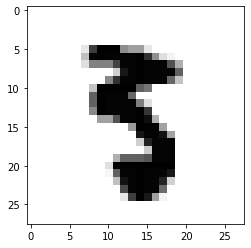

In [176]:
plt.imshow(X_test[2953].reshape(28,28), cmap='gray_r')
plt.show()

Эту тройку алгоритм считал пятёркой

In [173]:
np.where([(y_test == 3) & (y_test_pred == 5)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 938,  957, 1290, 2408, 2952, 2953, 4740, 6011, 6045, 6059, 8277,
        8290], dtype=int64))

Можем наблюдать, что теперь алгоритм правильно отгадал эту тройку: этого объекта нет среди таких ошибок. Вероятнее всего, этого удалось избежать с помощью поворота по часовой стрелке

In [174]:
np.where([(y_test == 3) & (y_test_pred_modified == 5)])

(array([0, 0, 0, 0, 0, 0], dtype=int64),
 array([2952, 4740, 5841, 6011, 6059, 8277], dtype=int64))

Ещё новый алгоритм стал реже считать семёрки девятками

In [179]:
np.where([(y_test == 7) & (y_test_pred == 9)])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([1522, 1721, 3333, 4199, 4578, 4690, 5600, 5620, 5655, 5714, 5835,
        5887, 5906], dtype=int64))

Например, ранее алгоритм эту семёрку считал девяткой

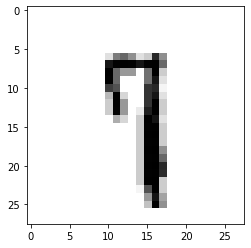

In [180]:
plt.imshow(X_test[1522].reshape(28,28), cmap='gray_r')
plt.show()

А теперь алгоритм правильно классифицировал семёрку. Этого удалось добиться, вероятно, за счёт поворота по часовой стрелке

In [178]:
np.where([(y_test == 7) & (y_test_pred_modified == 9)])

(array([0, 0, 0, 0, 0], dtype=int64),
 array([3333, 4007, 5835, 5887, 5906], dtype=int64))

В итоге, алгоритм стал работать значительно лучше. Матрица ошибок стала более диагональной. Причём этого удалось добиться, даже заново не производя кросс-валидацию для выбора оптимального $k$.

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*

In [283]:
#осталось применить все преобразования, получить результаты и нарисовать матрицу